## **Business Challenge:**
#### Amzen does not expect any new addition to their customer base due to above new scenario and they are entirely focused to retain existing customer base. They consider patient treatment status, Copay usage and adherence to therapy as crucial variable that could drive this analysis. Amzen wants to get possible answer to below mentioned problems:
### 1.	The client wants to estimate slippage of the patients from their system.
### 2.	Suggest possible approach to lower down the patient’s slippage, so to minimize overall loss.
### 3.	Weekly list Potential existing customers to be targeted.
### 4.	Design a new/alternative copay scheme, which could be better used by the patients.


In [1]:
# pip install numpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from datetime import datetime

In [3]:
data = pd.read_excel(r"D:\Amzen Problem HFCL\notebooks\data\copay data2.xls")
data.head()

,Pat_Id,Copay amount,Refill_date,Optin,Card_Status,Channel,Next_refill_date,card no
0,1,1745.71,2014-02-21,Y,Expired,Virtual,2014-03-23,1-1
1,2,35.00,2014-01-01,Y,Expired,Virtual,2014-01-31,1-2
2,3,50.00,2014-08-15,N,Active,Virtual,2014-09-14,1-3
3,3,50.00,2014-09-27,N,Active,Virtual,2014-12-26,1-3
4,3,50.00,2014-10-29,N,Active,Virtual,2015-01-27,1-3


In [4]:
data.shape

(55757, 8)

### ➡️Q1.	The client wants to estimate slippage of the patients from their system.

### Ans:-

##### Identify the last refill date for each patient and determine if there is a subsequent refill date.
##### Calculate the time difference between the last refill date and the next refill date.
##### Calculate the Copay ammount for every given pat_id.

##### Determine a threshold for what is considered a 'slip' .

##### Count the number of patients who have slipped according to the threshold.

In [5]:
from datetime import datetime
data['Refill_date'] = pd.to_datetime(data['Refill_date'])
data['Next_refill_date'] = pd.to_datetime(data['Next_refill_date'], errors='coerce')

### Calculate the difference in days between the refill date and the next refill date.
### Drop rows where next refill date is NaT (not a time) or where the next refill date is before the refill date. 

In [6]:
slippage_data = data.dropna(subset=['Next_refill_date'])
slippage_data = slippage_data[slippage_data['Next_refill_date'] > slippage_data['Refill_date']]
slippage_data['days_to_next_refill'] = (slippage_data['Next_refill_date'] - slippage_data['Refill_date']).dt.days

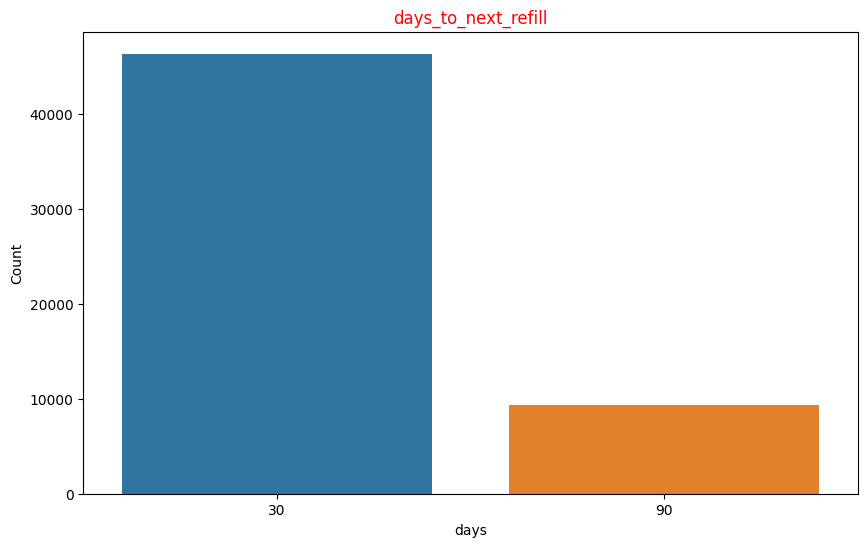

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='days_to_next_refill', data=slippage_data)
plt.title("days_to_next_refill",c="r")
plt.xlabel("days")
plt.ylabel('Count')
plt.show()

In [8]:
slippage_data['days_to_next_refill'].describe()

count    55757.000000
mean        40.090572
std         22.441562
min         30.000000
25%         30.000000
50%         30.000000
75%         30.000000
max         90.000000
Name: days_to_next_refill, dtype: float64

### Define a threshold for slippage as mean + 0.5 * standard deviation.

<Axes: xlabel='days_to_next_refill', ylabel='Count'>

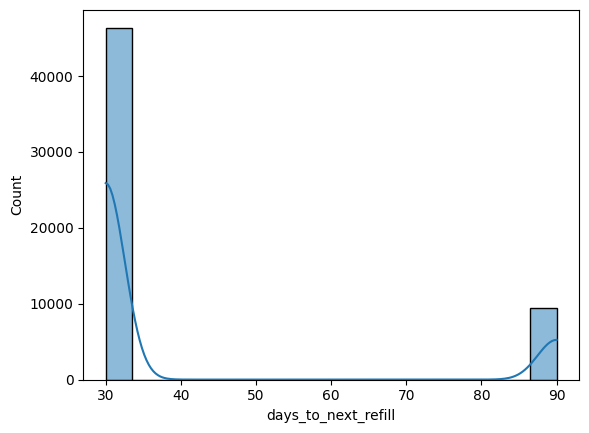

In [9]:
sns.histplot(slippage_data['days_to_next_refill'],kde=True)

In [10]:
slippage_threshold_days = slippage_data['days_to_next_refill'].mean() + 0.5 * slippage_data['days_to_next_refill'].std()

In [11]:
print('Slippage Threshold (days):', slippage_threshold_days)

Slippage Threshold (days): 51.3113524510564


In [12]:
slippage_threshold_Copay_ammount=slippage_data["Copay amount"].mean()+0.5*slippage_data["Copay amount"].std()

In [13]:
print('Slippage Threshold (Copay amount):', slippage_threshold_Copay_ammount)

Slippage Threshold (Copay amount): 414.4720788288865


### here we can apply Slippage Threshold(Copay amount= 414.4720788288865 or days= 51.3113524510564)

In [14]:
new_slippage_data=slippage_data[(slippage_data["Copay amount"]> 414.4720788288865) | (slippage_data["days_to_next_refill"]<51.3113524510564)]

In [15]:
new_slippage_data

,Pat_Id,Copay amount,Refill_date,Optin,Card_Status,Channel,Next_refill_date,card no,days_to_next_refill
0,1,1745.71,2014-02-21,Y,Expired,Virtual,2014-03-23,1-1,30
1,2,35.00,2014-01-01,Y,Expired,Virtual,2014-01-31,1-2,30
2,3,50.00,2014-08-15,N,Active,Virtual,2014-09-14,1-3,30
5,3,50.00,2014-11-03,N,Active,Virtual,2014-12-03,1-3,30
6,3,50.00,2014-12-09,N,Active,Virtual,2015-01-08,1-3,30
...,...,...,...,...,...,...,...,...,...
55751,10005,45.00,2014-04-01,N,Active,Virtual,2014-05-01,2-10005,30
55752,10005,35.00,2014-05-01,N,Active,Virtual,2014-05-31,2-10005,30
55753,10005,80.00,2014-07-01,N,Active,Virtual,2014-07-31,2-10005,30
55754,10005,45.00,2014-08-01,N,Active,Virtual,2014-08-31,2-10005,30


<Axes: ylabel='Frequency'>

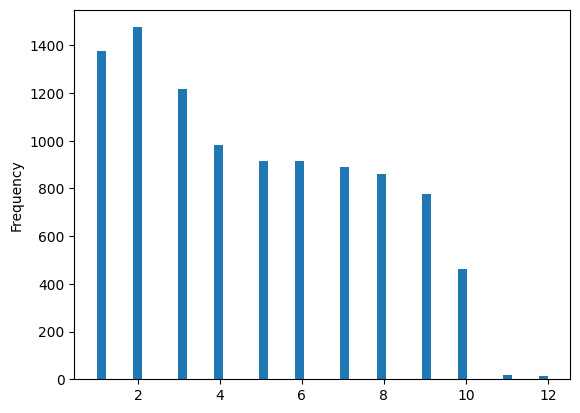

In [16]:
new_slippage_data["Pat_Id"].value_counts().plot(kind="hist",bins=50)

In [17]:
new_sllippage_data=slippage_data[(slippage_data["Copay amount"]< 414.4720788288865) | (slippage_data["days_to_next_refill"]>51.3113524510564)]

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
new_sllippage_data['Drop'] = ((new_sllippage_data['Optin'] == 'N') | (new_sllippage_data['Card_Status'] == 'Expired')).astype(int)

In [20]:
slippage_data=new_sllippage_data[(new_sllippage_data["Card_Status"]=="Expired") | (new_sllippage_data["Optin"]=="N")]

In [21]:
print(f" {slippage_data.shape[0]}  patients who potentially slipped from the system.")

 15718  patients who potentially slipped from the system.


```
➡️15718  patients who potentially slipped from the system.
```

In [22]:
slippage_data.head()

,Pat_Id,Copay amount,Refill_date,Optin,Card_Status,Channel,Next_refill_date,card no,days_to_next_refill,Drop
1,2,35.0,2014-01-01,Y,Expired,Virtual,2014-01-31,1-2,30,1
2,3,50.0,2014-08-15,N,Active,Virtual,2014-09-14,1-3,30,1
3,3,50.0,2014-09-27,N,Active,Virtual,2014-12-26,1-3,90,1
4,3,50.0,2014-10-29,N,Active,Virtual,2015-01-27,1-3,90,1
5,3,50.0,2014-11-03,N,Active,Virtual,2014-12-03,1-3,30,1


In [36]:
slippage_data.to_csv("D:\Amzen Problem HFCL\\artifacts\\slippage_data")

### ➡️Q2.	Suggest possible approach to lower down the patient’s slippage, so to minimize overall loss.

### ➡️Q3.	Weekly list Potential existing customers to be targeted.

In [37]:
existing_data=slippage_data[(slippage_data["Copay amount"]> 414.4720788288865) | (slippage_data["days_to_next_refill"]<51.3113524510564)]

In [38]:
new_existing_data=existing_data[(existing_data["Card_Status"]=="Active") | (existing_data["Optin"]=="Y")]

In [39]:
new_existing_data.head()

,Pat_Id,Copay amount,Refill_date,Optin,Card_Status,Channel,Next_refill_date,card no,days_to_next_refill,Drop
1,2,35.0,2014-01-01,Y,Expired,Virtual,2014-01-31,1-2,30,1
2,3,50.0,2014-08-15,N,Active,Virtual,2014-09-14,1-3,30,1
5,3,50.0,2014-11-03,N,Active,Virtual,2014-12-03,1-3,30,1
6,3,50.0,2014-12-09,N,Active,Virtual,2015-01-08,1-3,30,1
11,6,20.0,2014-04-30,N,Active,Virtual,2014-05-30,1-6,30,1


### ➡️Q4.	Design a new/alternative copay scheme, which could be better used by the patients.